In [37]:
import tensorflow as tf
from src.dataset import mfccs_dataset, stft_dataset, OSBH_PATH, balance_dataset, show_dataset_balance
from src.plots import plot_history

train_mfccs_ds, val_mfccs_ds, label_names, mfccs_input_shape = mfccs_dataset(OSBH_PATH, 0.80, 4, True, 0)
train_stft_ds, val_stft_ds, label_names, stft_input_shape = stft_dataset(OSBH_PATH, 0.80, 4, True, 0)

print("BALANCE EVAL")
val_stft_ds = balance_dataset(val_stft_ds)
show_dataset_balance(val_stft_ds)
val_mfccs_ds = balance_dataset(val_mfccs_ds)
show_dataset_balance(val_mfccs_ds)

Found 900 files belonging to 2 classes.
Using 180 files for training.
Using 720 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (4, 4000)
Example label shape: (4,)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)

===== MFCCs (num_spectrogram_bins, sample_rate, num_mfccs) ====
513 44100 12
513 44100 12

Before balancing
Queen: 38% (68), Noqueen: 62% (112)

After balancing
Queen: 50% (68), Noqueen: 50% (68)

 ==== MFCCs input shape ==== 
(12, 12, 1)
Found 900 files belonging to 2 classes.
Using 180 files for training.
Using 720 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dty

In [38]:
trained_mfcc_conv_mini = tf.keras.models.load_model("models/nuhive_mfcc_conv.keras")
trained_stft_conv = tf.keras.models.load_model("models/nuhive_stft_conv.keras")

In [39]:
results = trained_mfcc_conv_mini.evaluate(val_mfccs_ds)
print(f"Evaluated MFCC Conv: {results}")

results = trained_stft_conv.evaluate(val_stft_ds)
print(f"Evaluated STFT Conv: {results}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4826 - loss: 2.4754
Evaluated MFCC Conv: [2.2097222805023193, 0.5167286396026611]
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4895 - loss: 14.8580
Evaluated STFT Conv: [14.160575866699219, 0.5]


# Transfer STFT

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5257 - loss: 6.4624 - val_accuracy: 0.5335 - val_loss: 4.8010
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6050 - loss: 2.5764 - val_accuracy: 0.6654 - val_loss: 1.6245
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6860 - loss: 1.2602 - val_accuracy: 0.6914 - val_loss: 1.3380
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7563 - loss: 1.0379 - val_accuracy: 0.6933 - val_loss: 1.0609
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7596 - loss: 0.9542 - val_accuracy: 0.7156 - val_loss: 1.0192
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7703 - loss: 0.8335 - val_accuracy: 0.7305 - val_loss: 0.9050
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7107 - loss: 0.9880 - val_accuracy: 0.7193 - val_loss: 0.8556
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7709 - loss: 0.7670 - val_accuracy: 0.7230 - val_loss: 0.7833


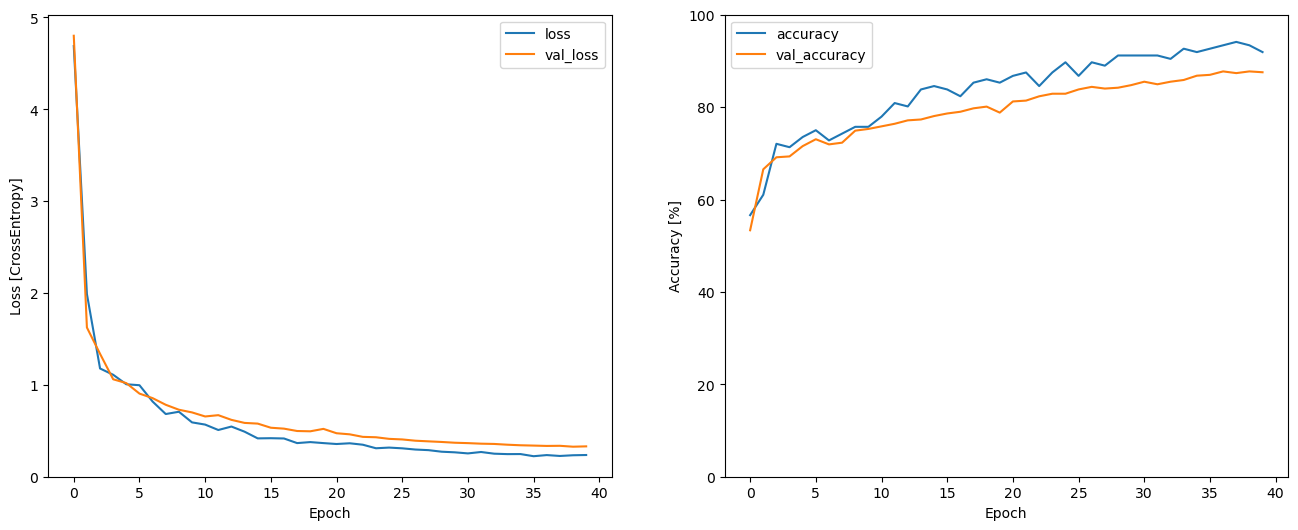

In [40]:
history_trained_stft_conv = trained_stft_conv.fit(
    train_stft_ds, 
    validation_data=val_stft_ds, 
    epochs=40,
    
)

plot_history(history_trained_stft_conv)

# Transfer MFCC

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4208 - loss: 2.0983 - val_accuracy: 0.5483 - val_loss: 1.2157
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5735 - loss: 0.9196 - val_accuracy: 0.6375 - val_loss: 0.6240
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5768 - loss: 0.6720 - val_accuracy: 0.6803 - val_loss: 0.5881
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6430 - loss: 0.6336 - val_accuracy: 0.7658 - val_loss: 0.5370
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6995 - loss: 0.5758 - val_accuracy: 0.7621 - val_loss: 0.4913
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6491 - loss: 0.5877 - val_accuracy: 0.8216 - val_loss: 0.4522
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8161 - loss: 0.4506 - val_accuracy: 0.8606 - val_loss: 0.4044
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7962 - loss: 0.4624 - val_accuracy: 0.8736 - val_loss: 0.3634
Epoch 9/

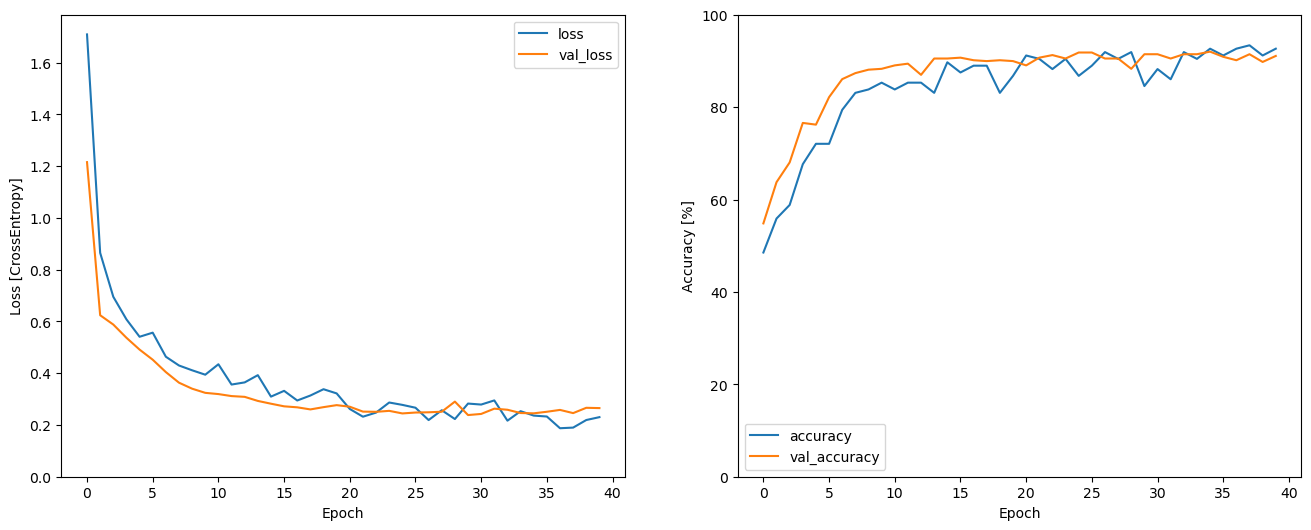

In [41]:
history_trained_history_mfcc_conv_mini = trained_mfcc_conv_mini.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=40,
)

plot_history(history_trained_history_mfcc_conv_mini)

In [42]:
trained_mfcc_conv_mini.save('models/trans_mfcc_conv_mini.keras')
trained_stft_conv.save('models/trans_stft_conv.keras')
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, VLoss: {history.history['val_loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f},  VAcc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("Tr. MFCCs + Conv Mini      ", history_trained_history_mfcc_conv_mini)
history_to_summary("Tr. STFT + Conv      ", history_trained_stft_conv)

Tr. MFCCs + Conv Mini      :    Loss: 0.23, VLoss: 0.27, Acc: 0.93,  VAcc: 0.91
Tr. STFT + Conv      :    Loss: 0.24, VLoss: 0.33, Acc: 0.92,  VAcc: 0.88
